# Identifying safe loans with decision trees

The [LendingClub](https://www.lendingclub.com/) is a peer-to-peer leading company that directly connects borrowers and potential lenders/investors. In this notebook, you will build a classification model to predict whether or not a loan provided by LendingClub is likely to [default](https://en.wikipedia.org/wiki/Default_%28finance%29).

In this notebook you will use data from the LendingClub to predict whether a loan will be paid off in full or the loan will be [charged off](https://en.wikipedia.org/wiki/Charge-off) and possibly go into default. In this assignment you will:

* Use sklearn to do some feature engineering.
* Train a decision-tree on the LendingClub dataset.
* Visualize the tree.
* Predict whether a loan will default along with prediction probabilities (on a validation set).
* Train a complex tree model and compare it to simple tree model.

Let's get started!

In [119]:
import numpy as np
import pandas as pd
import os

# Note that your python interpreter needs to be running in the same directory as this notebook
print(os.getcwd())

D:\Anupam_Technical\Code\ML\DS_ML_Projects\Classification\DecisionTrees


# Load LendingClub dataset

We will be using a dataset from the [LendingClub](https://www.lendingclub.com/). A parsed and cleaned form of the dataset is availiable [here](https://github.com/learnml/machine-learning-specialization-private). Make sure you **download the dataset** before running the following command.

In [120]:
loans = pd.read_csv('data/lending-club-data.csv')
loans.head()

C:\Users\anupam\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,is_inc_v,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,not_compliant,status,inactive_loans,bad_loans,emp_length_num,grade_num,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,final_d,last_delinq_none,last_record_none,last_major_derog_none
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,20111201T000000,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,19850101T000000,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.07,5831.78,5000.00,861.07,0.00,0.00,0.00,20150101T000000,171.62,NaN,20150101T000000,0.0,NaN,1,0,Fully Paid,1,0,11,5,0.4,1.0,1.0,1.0,0,8.14350,20141201T000000,1,1,1
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,20111201T000000,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,19990401T000000,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,20130401T000000,119.66,NaN,20130901T000000,0.0,NaN,1,0,Charged Off,1,1,1,4,0.8,1.0,1.0,1.0,1,2.39320,20161201T000000,1,1,1
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,20111201T000000,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,20011101T000000,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.65,3003.65,2400.00,603.65,0.00,0.00,0.00,20140601T000000,649.91,NaN,20150201T000000,0.0,NaN,1,0,Fully Paid,1,0,11,4,1.0,1.0,1.0,1.0,0,8.25955,20141201T000000,1,1,1
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,20111201T000000,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,19960201T000000,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.30,12226.30,10000.00,2209.33,16.97,0.00,0.00,20150101T000000,357.48,NaN,20150101T000000,0.0,NaN,1,0,Fully Paid,1,0,11,4,0.2,1.0,1.0,1.0,0,8.27585,20141201T000000,0,1,1
4,1075269,1311441,5000,5000,5000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,20111201T000000,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,20041101T000000,3.0,NaN,NaN,9.0,0.0,7963,28.3,12.0,f,0.0,0.0,5631.38,5631.38,5000.00,631.38,0.00,0.00,0.00,20150101T000000,161.03,NaN,20150201T000000,0.0,NaN,1,0,Fully Paid,1,0,4,6,0.8,1.0,1.0,1.0,0,5.21533,20141201T000000,1,1,1


## Exploring some features

Let's quickly explore what the dataset looks like. First, let's print out the column names to see what features we have in this dataset.

In [121]:
print('Total number of records: {}'.format(len(loans)))
print('ColumnNames:')
print(loans.columns.values)

Total number of records: 122607
ColumnNames:
['id' 'member_id' 'loan_amnt' 'funded_amnt' 'funded_amnt_inv' 'term'
 'int_rate' 'installment' 'grade' 'sub_grade' 'emp_title' 'emp_length'
 'home_ownership' 'annual_inc' 'is_inc_v' 'issue_d' 'loan_status'
 'pymnt_plan' 'url' 'desc' 'purpose' 'title' 'zip_code' 'addr_state' 'dti'
 'delinq_2yrs' 'earliest_cr_line' 'inq_last_6mths'
 'mths_since_last_delinq' 'mths_since_last_record' 'open_acc' 'pub_rec'
 'revol_bal' 'revol_util' 'total_acc' 'initial_list_status' 'out_prncp'
 'out_prncp_inv' 'total_pymnt' 'total_pymnt_inv' 'total_rec_prncp'
 'total_rec_int' 'total_rec_late_fee' 'recoveries'
 'collection_recovery_fee' 'last_pymnt_d' 'last_pymnt_amnt' 'next_pymnt_d'
 'last_credit_pull_d' 'collections_12_mths_ex_med'
 'mths_since_last_major_derog' 'policy_code' 'not_compliant' 'status'
 'inactive_loans' 'bad_loans' 'emp_length_num' 'grade_num' 'sub_grade_num'
 'delinq_2yrs_zero' 'pub_rec_zero' 'collections_12_mths_zero' 'short_emp'
 'payment_inc_ra

Here, we see that we have some feature columns that have to do with grade of the loan, annual income, home ownership status, etc. Let's take a look at the distribution of loan grades in the dataset.

In [122]:
loans['grade'].value_counts()

B    37172
C    29950
A    22314
D    19175
E     8990
F     3932
G     1074
Name: grade, dtype: int64

We can see that over half of the loan grades are assigned values `B` or `C`. Each loan is assigned one of these grades, along with a more finely discretized feature called `sub_grade` (feel free to explore that feature column as well!). These values depend on the loan application and credit report, and determine the interest rate of the loan. More information can be found [here](https://www.lendingclub.com/public/rates-and-fees.action).

Now, let's look at a different feature.

In [123]:
loans['sub_grade'].value_counts()

B3    9036
B4    8279
B2    7096
C1    7068
B5    6924
C2    6726
A5    6027
A4    5993
B1    5837
C3    5690
C4    5402
C5    5064
D1    4593
D2    4391
A3    3955
D3    3745
D4    3489
A2    3352
A1    2987
D5    2957
E2    2184
E1    2080
E3    1785
E4    1581
E5    1360
F1    1105
F2     930
F3     770
F4     629
F5     498
G1     370
G2     241
G3     167
G4     152
G5     144
Name: sub_grade, dtype: int64

In [124]:
loans['home_ownership'].value_counts()

MORTGAGE    59240
RENT        53245
OWN          9943
OTHER         179
Name: home_ownership, dtype: int64

This feature describes whether the loanee is mortaging, renting, or owns a home. We can see that a small percentage of the loanees own a home.

## Exploring the target column

The target column (label column) of the dataset that we are interested in is called `bad_loans`. In this column **1** means a risky (bad) loan **0** means a safe  loan.

In order to make this more intuitive and consistent with the lectures, we reassign the target to be:
* **+1** as a safe  loan, 
* **-1** as a risky (bad) loan. 

We put this in a new column called `safe_loans`.

In [125]:
# safe_loans =  1 => safe
# safe_loans = -1 => risky
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
loans = loans.drop(['bad_loans'], axis=1)
sl = loans['safe_loans'].value_counts()
sl

 1    99457
-1    23150
Name: safe_loans, dtype: int64

Now, let us explore the distribution of the column `safe_loans`. This gives us a sense of how many safe and risky loans are present in the dataset.

In [126]:
loans_count = sl[1]+sl[-1] 
safe_loan_percent = (sl[1] / loans_count) * 100
risky_loan_percent = (sl[-1] / loans_count) * 100
print('safe loan percentage: {:.2f}'.format(safe_loan_percent))
print('risky loan percentage: {:.2f}'.format(risky_loan_percent))

safe loan percentage: 81.12
risky loan percentage: 18.88


You should have:
* Around 81% safe loans
* Around 19% risky loans

It looks like most of these loans are safe loans (thankfully). But this does make our problem of identifying risky loans challenging.

## Features for the classification algorithm

In this assignment, we will be using a subset of features (categorical and numeric). The features we will be using are **described in the code comments** below. If you are a finance geek, the [LendingClub](https://www.lendingclub.com/) website has a lot more details about these features.

In [127]:
features = ['grade',                     # grade of the loan
            'sub_grade',                 # sub-grade of the loan
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'term',                      # the term of the loan
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
           ]

target = 'safe_loans'                   # prediction target (y) (+1 means safe, -1 is risky)

# Extract the feature columns and target column
loans = loans[features + [target]]
print(loans.columns)

Index(['grade', 'sub_grade', 'short_emp', 'emp_length_num', 'home_ownership',
       'dti', 'purpose', 'term', 'last_delinq_none', 'last_major_derog_none',
       'revol_util', 'total_rec_late_fee', 'safe_loans'],
      dtype='object')


## One-hot encoding
For scikit-learn's decision tree implementation, it requires numerical values for it's data matrix. This means you will have to turn categorical variables into binary features via one-hot encoding.

In [128]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoding(df, cols):
    # any non numeric column (with data type = object) is considered categorical
    for col in cols:
        one_hot_encoder = OneHotEncoder(sparse=False)
        col_onehot_encoded = one_hot_encoder.fit_transform(df[col].values.reshape(-1, 1))
        col_df_colnames = [col+name[2:] for name in one_hot_encoder.get_feature_names()]
        col_onehot_encoded_df = pd.DataFrame(data=col_onehot_encoded, columns=col_df_colnames)
        df = pd.concat([df, col_onehot_encoded_df], axis=1)
    return df

categorical_cols = [xcol for xcol in loans.columns if loans.dtypes[xcol] == 'object']
loans_data = one_hot_encoding(loans, categorical_cols)

What remains now is a **subset of features** and the **target** that we will use for the rest of this notebook. 

## Sample data to balance classes

As we explored above, our data is disproportionally full of safe loans.  Let's create two datasets: one with just the safe loans (`safe_loans_raw`) and one with just the risky loans (`risky_loans_raw`).

In [129]:
safe_loans_raw = loans_data[loans_data[target] == +1]
risky_loans_raw = loans_data[loans_data[target] == -1]
print("Number of safe loans  : %s" % len(safe_loans_raw))
print("Number of risky loans : %s" % len(risky_loans_raw))

Number of safe loans  : 99457
Number of risky loans : 23150


One way to combat class imbalance is to undersample the larger class until the class distribution is approximately half and half. Here, we will undersample the larger class (safe loans) in order to balance out our dataset. This means we are throwing away many data points. We used `seed=1` so everyone gets the same results.

In [130]:
# Since there are fewer risky loans than safe loans, find the ratio of the sizes
# and use that percentage to undersample the safe loans.
percentage = len(risky_loans_raw)/float(len(safe_loans_raw))
sampled_safe_loans_count = int(percentage * len(safe_loans_raw))
print('Sample safe loans count: %s' % sampled_safe_loans_count)
risky_loans = risky_loans_raw
safe_loans = safe_loans_raw.sample(sampled_safe_loans_count, random_state=1)

# Append the risky_loans with the downsampled version of safe_loans
loans_data = risky_loans.append(safe_loans)

Sample safe loans count: 23150


Now, let's verify that the resulting percentage of safe and risky loans are each nearly 50%.

In [131]:
print("Percentage of safe loans                 : %s" % (len(safe_loans) / float(len(loans_data))))
print("Percentage of risky loans                : %s" % (len(risky_loans) / float(len(loans_data))))
print("Total number of loans in our new dataset : %s" % len(loans_data))

Percentage of safe loans                 : 0.5
Percentage of risky loans                : 0.5
Total number of loans in our new dataset : 46300


**Note:** There are many approaches for dealing with imbalanced data, including some where we modify the learning algorithm. These approaches are beyond the scope of this course, but some of them are reviewed in this [paper](http://ieeexplore.ieee.org/xpl/login.jsp?tp=&arnumber=5128907&url=http%3A%2F%2Fieeexplore.ieee.org%2Fiel5%2F69%2F5173046%2F05128907.pdf%3Farnumber%3D5128907 ). For this assignment, we use the simplest possible approach, where we subsample the overly represented class to get a more balanced dataset. In general, and especially when the data is highly imbalanced, we recommend using more advanced methods.

## Split data into training and validation sets

We split the data into training and validation sets using an 80/20 split and specifying `seed=1` so everyone gets the same results.

**Note**: In previous assignments, we have called this a **train-test split**. However, the portion of data that we don't train on will be used to help **select model parameters** (this is known as model selection). Thus, this portion of data should be called a **validation set**. Recall that examining performance of various potential models (i.e. models with different parameters) should be on validation set, while evaluation of the final selected model should always be on test data. Typically, we would also save a portion of the data (a real test set) to test our final model on or use cross-validation on the training set to select our final model. But for the learning purposes of this assignment, we won't do that.

In [132]:
from sklearn.model_selection import train_test_split

loans_data = loans_data.drop(categorical_cols, axis=1)
loans_train, loans_test = train_test_split(loans_data, test_size=0.2, random_state=42)
X_train = loans_train.loc[:, loans_train.columns != target].values
X_test = loans_test.loc[:, loans_test.columns != target].values
y1d_train = loans_train[target].values
y1d_test = loans_test[target].values
y_train = y1d_train.reshape(-1, 1)
y_test = y1d_test.reshape(-1, 1)
print(X_train.shape)
print(y_train.shape)

(37040, 67)
(37040, 1)


# Use decision tree to build a classifier

Now, let's use the built-in sklearn DecisionTreeClassifier to create a loan prediction model on the training data. (In the next assignment, you will implement your own decision tree learning algorithm.)  Our feature columns and target column have already been decided above. 

In [109]:
from sklearn import tree
import matplotlib.pyplot as plt

small_decision_tree_model = tree.DecisionTreeClassifier(max_depth=2)
small_decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Visualizing a learned model

As noted in the [documentation](https://dato.com/products/create/docs/generated/graphlab.boosted_trees_classifier.create.html#graphlab.boosted_trees_classifier.create), typically the max depth of the tree is capped at 6. However, such a tree can be hard to visualize graphically.  Here, we instead learn a smaller model with **max depth of 2** to gain some intuition by visualizing the learned tree.

[Text(167.4, 181.2, 'term <= 0.5\ngini = 0.5\nsamples = 37040\nvalue = [18521, 18519]\nclass = safe'),
 Text(83.7, 108.72, 'last_delinq_none <= 0.5\ngini = 0.496\nsamples = 31791\nvalue = [17251, 14540]\nclass = safe'),
 Text(41.85, 36.23999999999998, 'gini = 0.482\nsamples = 21694\nvalue = [12926, 8768]\nclass = safe'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.49\nsamples = 10097\nvalue = [4325, 5772]\nclass = risky'),
 Text(251.10000000000002, 108.72, 'purpose <= 0.005\ngini = 0.367\nsamples = 5249\nvalue = [1270, 3979]\nclass = risky'),
 Text(209.25, 36.23999999999998, 'gini = 0.35\nsamples = 5091\nvalue = [1152, 3939]\nclass = risky'),
 Text(292.95, 36.23999999999998, 'gini = 0.378\nsamples = 158\nvalue = [118, 40]\nclass = safe')]

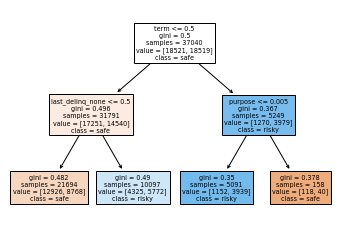

In [110]:
tree.plot_tree(small_decision_tree_model, feature_names=features, class_names=['safe', 'risky'], filled=True)

# Making predictions

Let's consider two positive and two negative examples **from the validation set** and see what the model predicts. We will do the following:
* Predict whether or not a loan is safe.
* Predict the probability that a loan is safe.

In [111]:
test_safe_loans = loans_test[loans_test[target] == 1].loc[:, loans_test.columns != target]
test_risky_loans = loans_test[loans_test[target] == -1].loc[:, loans_test.columns != target]

sample_test_data_risky = test_risky_loans[0:2]
sample_test_data_safe = test_safe_loans[0:2]

sample_test_data = sample_test_data_safe.append(sample_test_data_risky)
# To display all columns in the dataframe
pd.set_option('display.max_columns', None)
sample_test_data

,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
98409,0,6,14.87,1,1,36.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
78809,0,8,13.24,1,1,51.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
35751,0,11,2.87,0,1,91.9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
69905,0,11,4.01,1,1,96.4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Explore label predictions

Now, we will use our model  to predict whether or not a loan is likely to default. For each row in the **sample_validation_data**, use the **decision_tree_model** to predict whether or not the loan is classified as a **safe loan**. 

**Hint:** Be sure to use the `.predict()` method.

In [112]:
decision_tree_model = tree.DecisionTreeClassifier(max_depth=6)
decision_tree_model.fit(X_train, y_train)
decision_tree_model.predict(sample_test_data)

array([ 1,  1, -1, -1], dtype=int64)

**Quiz Question:** What percentage of the predictions on `sample_validation_data` did `decision_tree_model` get correct?

## Explore probability predictions

For each row in the **sample_validation_data**, what is the probability (according **decision_tree_model**) of a loan being classified as **safe**? 

In [113]:
# the output classes
print(decision_tree_model.classes_)
# probability of the loan being safe ( note that predict_proba returns a 2d array where each item is an array whose each element 
# is the predicted probability of the corresponding output class)
print(decision_tree_model.predict_proba(sample_test_data)[:, 1])

[-1  1]
[0.73760331 0.6232739  0.35633368 0.35633368]


**Quiz Question:** Which loan has the highest probability of being classified as a **safe loan**?

**Checkpoint:** Can you verify that for all the predictions with `probability >= 0.5`, the model predicted the label **+1**?

### Tricky predictions!

Now, we will explore something pretty interesting. For each row in the **sample_validation_data**, what is the probability (according to **small_model**) of a loan being classified as **safe**?

In [84]:
print(small_decision_tree_model.predict(sample_test_data))
print(small_decision_tree_model.predict_proba(sample_test_data)[:, 1])

[ 1  1 -1 -1]
[0.77371833 0.57165495 0.40416705 0.40416705]


**Quiz Question:** Notice that the probability preditions are the **exact same** for the 2nd and 3rd loans. Why would this happen?

## Visualize the prediction on a tree


Note that you should be able to look at the small tree, traverse it yourself, and visualize the prediction being made. Consider the following point in the **sample_validation_data**

In [114]:
# Display all rows of a dataframe or series
pd.set_option('display.max_rows', None)
# Note that the second row in sample_test_data has an index value of '78809'
loans.loc[78809]

grade                              B
sub_grade                         B3
short_emp                          0
emp_length_num                     8
home_ownership              MORTGAGE
dti                            13.24
purpose                  credit_card
term                       36 months
last_delinq_none                   1
last_major_derog_none              1
revol_util                      51.8
total_rec_late_fee                 0
safe_loans                         1
Name: 78809, dtype: object

Let's visualize the small tree here to do the traversing for this data point.

In [ ]:
small_model.show(view="Tree")

**Note:** In the tree visualization above, the values at the leaf nodes are not class predictions but scores (a slightly advanced concept that is out of the scope of this course). You can read more about this [here](https://homes.cs.washington.edu/~tqchen/pdf/BoostedTree.pdf).  If the score is $\geq$ 0, the class +1 is predicted.  Otherwise, if the score < 0, we predict class -1.


**Quiz Question:** Based on the visualized tree, what prediction would you make for this data point?

Now, let's verify your prediction by examining the prediction made using GraphLab Create.  Use the `.predict` function on `small_model`.

# Evaluating accuracy of the decision tree model

Recall that the accuracy is defined as follows:
$$
\mbox{accuracy} = \frac{\mbox{# correctly classified examples}}{\mbox{# total examples}}
$$

Let us start by evaluating the accuracy of the `small_model` and `decision_tree_model` on the training data

In [144]:
def get_classification_accuracy(model, data, true_labels):
    # First get the predictions
    predicted_labels = model.predict(data)    
    # Compute the number of correctly classified examples
    is_correct = predicted_labels == true_labels    
    # Then compute accuracy by dividing num_correct by total number of examples
    accuracy = len(predicted_labels[is_correct]) / len(is_correct)    
    return round(accuracy, 4)

small_model_accuracy = get_classification_accuracy(small_decision_tree_model, X_train, y1d_train)
big_model_accuracy = get_classification_accuracy(decision_tree_model, X_train, y1d_train)
print("Small model accuracy on train data: {}".format(small_model_accuracy))
print("Model accuracy on train data: {}".format(big_model_accuracy))

Small model accuracy on train data: 0.6143
Model accuracy on train data: 0.6384


**Checkpoint:** You should see that the **small_model** performs worse than the **decision_tree_model** on the training data.


Now, let us evaluate the accuracy of the **small_model** and **decision_tree_model** on the entire **validation_data**, not just the subsample considered above.

In [145]:
small_model_accuracy_test = get_classification_accuracy(small_decision_tree_model, X_test, y1d_test)
model_accuracy_test = get_classification_accuracy(decision_tree_model, X_test, y1d_test)
print("Small model accuracy on test data: {}".format(small_model_accuracy_test))
print("Model accuracy on test data: {}".format(model_accuracy_test))

Small model accuracy on test data: 0.6157
Model accuracy on test data: 0.6285


**Quiz Question:** What is the accuracy of `decision_tree_model` on the validation set, rounded to the nearest .01?

## Evaluating accuracy of a complex decision tree model

Here, we will train a large decision tree with `max_depth=10`. This will allow the learned tree to become very deep, and result in a very complex model. Recall that in lecture, we prefer simpler models with similar predictive power. This will be an example of a more complicated model which has similar predictive power, i.e. something we don't want.

In [146]:
big_decision_tree_model = tree.DecisionTreeClassifier(max_depth=10)
big_decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Now, let us evaluate **big_model** on the training set and validation set.

In [148]:
big_model_accuracy_train = get_classification_accuracy(big_decision_tree_model, X_train, y1d_train)
big_model_accuracy_test = get_classification_accuracy(big_decision_tree_model, X_test, y1d_test)
print("Big model accuracy on train data: {}".format(big_model_accuracy_train))
print("Big model accuracy on test data: {}".format(big_model_accuracy_test))

Big model accuracy on train data: 0.6636
Big model accuracy on test data: 0.6283


**Checkpoint:** We should see that **big_model** has even better performance on the training set than **decision_tree_model** did on the training set.

**Quiz Question:** How does the performance of **big_model** on the validation set compare to **decision_tree_model** on the validation set? Is this a sign of overfitting?

### Quantifying the cost of mistakes

Every mistake the model makes costs money. In this section, we will try and quantify the cost of each mistake made by the model.

Assume the following:

* **False negatives**: Loans that were actually safe but were predicted to be risky. This results in an oppurtunity cost of losing a loan that would have otherwise been accepted. 
* **False positives**: Loans that were actually risky but were predicted to be safe. These are much more expensive because it results in a risky loan being given. 
* **Correct predictions**: All correct predictions don't typically incur any cost.


Let's write code that can compute the cost of mistakes made by the model. Complete the following 4 steps:
1. First, let us compute the predictions made by the model.
1. Second, compute the number of false positives.
2. Third, compute the number of false negatives.
3. Finally, compute the cost of mistakes made by the model by adding up the costs of true positives and false positives.

First, let us make predictions on `validation_data` using the `decision_tree_model`:

In [159]:
predicted_y_test = decision_tree_model.predict(X_test)
is_correct = y1d_test == predicted_y_test
incorrect_predictions = predicted_y_test[~is_correct]
len(incorrect_predictions)

3440

**False positives** are predictions where the model predicts +1 but the true label is -1. Complete the following code block for the number of false positives:

In [160]:
false_positives = [prediction for prediction in incorrect_predictions if prediction == 1]
len(false_positives)

1428

**False negatives** are predictions where the model predicts -1 but the true label is +1. Complete the following code block for the number of false negatives:

In [161]:
false_negatives = [prediction for prediction in incorrect_predictions if prediction == -1]
len(false_negatives)

2012

**Quiz Question:** Let us assume that each mistake costs money:
* Assume a cost of \$10,000 per false negative.
* Assume a cost of \$20,000 per false positive.

What is the total cost of mistakes made by `decision_tree_model` on `validation_data`?

In [162]:
(len(false_positives) * 20000) + (len(false_negatives) * 10000)

48680000